 3.1.Problem 1- Data Read, Write and Inspect:
 Complete all following Task:
 • Dataset for the Task: "bank.csv"
 1. Load the provided dataset and import in pandas DataFrame.
 2. Check info of the DataFrame and identify following:
 (a) columns with dtypes=object
 (b) unique values of those columns.
 (c) check for the total number of null values in each column.
 3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
 ”.csv” with name ”banknumericdata.csv”
 4. Read ”banknumericdata.csv” and Find the summary statistics

In [3]:
import pandas as pd

# 1
df = pd.read_csv('/content/drive/MyDrive/Datasets/bank .csv')

# 2
object_columns = df.select_dtypes(include='object')
print("Columns with dtype=object:")
print(object_columns.columns)

for col in object_columns.columns:
    print(f"{col}: {df[col].unique()}")

#Checking null values
print("\nNull values in each column:")
print(df.isnull().sum())

# 3
numeric_df = df.select_dtypes(exclude='object')
numeric_df.to_csv("banknumericdata.csv", index=False)
print("\nNumeric DataFrame saved as 'banknumericdata.csv'.")

# 4
numeric_data = pd.read_csv("banknumericdata.csv")
print("\nSummary statistics:")
print(numeric_data.describe())


Columns with dtype=object:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']

Null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Numeric DataFrame saved as 'banknu

 3.1.Problem 2- Data Imputations:
 Complete all the following Task:
 • Dataset for the Task: "medical_student.csv"
 1. Load the provided dataset and import in pandas DataFrame.
 2. Check info of the DataFrame and identify column with missing (null) values.
 3. For the column with missing values fill the values using various techniques we discussed above. Try
 to explain why did you select the particular methods for particular column.
 4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
 {Hint: dataset.duplicated.sum()}

In [ ]:
import pandas as pd

# 1
file_path = "/content/drive/MyDrive/Datasets/medical_students_dataset.csv"
df = pd.read_csv(file_path)

# 2
print("DataFrame Info:")
print(df.info())

#Missing values in the column
missing_values = df.isnull().sum()
print("\nColumns with missing values:")
print(missing_values[missing_values > 0])

# 3. filling missing values
for col in missing_values[missing_values > 0].index:
    if df[col].dtype in ['float64', 'int64']:
        #for numeric colums
        df[col].fillna(df[col].mean(), inplace=True)
        print(f"Filled missing values in numeric column '{col}' with mean: {df[col].mean()}")
    else:
        #for categorized colums
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Filled missing values in categorical column '{col}' with mode: {df[col].mode()[0]}")

# 4
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

if duplicates > 0:
    # dropping duplicate rows
    df = df.drop_duplicates()
    print(f"Duplicate rows removed. New dataset size: {df.shape}")

print("\nFinal Dataset Info:")
print(df.info())

df.to_csv("medical_student_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'medical_student_cleaned.csv'.")


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Columns with missing values:
Student ID        20000
Age               20000
Gender            20000
Height            20000

<ipython-input-8-31e58826d84d>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-8-31e58826d84d>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Filled missing values in categorical column 'Gender' with mode: Male
Filled missing values in numeric column 'Height' with mean: 174.94710266857416
Filled missing values in numeric column 'Weight' with mean: 69.97158509186077
Filled missing values in categorical column 'Blood Type' with mode: B
Filled missing values in numeric column 'BMI' with mean: 23.338869359639226
Filled missing values in numeric column 'Temperature' with mean: 98.60094787707666
Filled missing values in numeric column 'Heart Rate' with mean: 79.50376666666666
Filled missing values in numeric column 'Blood Pressure' with mean: 114.55803333333333
Filled missing values in numeric column 'Cholesterol' with mean: 184.4863611111111
Filled missing values in categorical column 'Diabetes' with mode: No
Filled missing values in categorical column 'Smoking' with mode: No

Number of duplicate rows: 12572
Duplicate rows removed. New dataset size: (187428, 13)

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 18

3.2 Exercises- Data Cleaning and Transformations with ”Titanic Dataset”:
 Dataset Used: "titanic.csv"
 Problem- 1:
 Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
 Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
 median, maximum value, and minimum value of the ’Fare’ column?

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Datasets/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Creating subset DataFrame
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class_df = subset_df[subset_df['Pclass'] == 1]

mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()
print("Statistics for 'Fare' column (First-Class Passengers):")
print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")


Statistics for 'Fare' column (First-Class Passengers):
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


 3.2.Problem- 2:
 How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
 this out, drop them from your DataFrame

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Datasets/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

null_age_count = subset_df['Age'].isnull().sum()
print(f"Number of null values in 'Age' column: {null_age_count}")

cleaned_df = subset_df.dropna(subset=['Age'])
removed_rows = len(subset_df) - len(cleaned_df)
print(f"Number of rows removed: {removed_rows}")
print(f"DataFrame shape after removing null values: {cleaned_df.shape}")


Number of null values in 'Age' column: 177
Number of rows removed: 177
DataFrame shape after removing null values: (714, 6)


3.2.Problem- 3:
 The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka
tion:
 • ’C’ for Cherbourg
 • ’Q’ for Queenstown
 • ’S’ for Southampton
 Task:
 1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
 ’Embarked Q’, ’Embarked S’).
 2. Add these new columns to the original DataFrame.
 3. Drop the original ’Embarked’ column.
 4. Print the first few rows of the modified DataFrame to verify the changes.

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Datasets/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# 1
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# 2
df = pd.concat([df, embarked_dummies], axis=1)

# 3
df.drop('Embarked', axis=1, inplace=True)

# 4
print("Modified DataFrame:")
print(df.head())


Modified DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       

 3.2.Problem- 4:
 Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual
ization to show how the survival distributions vary by gender

Mean Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-17-260d2c70b65f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_survival_by_gender.index, y=mean_survival_by_gender.values, palette="coolwarm")


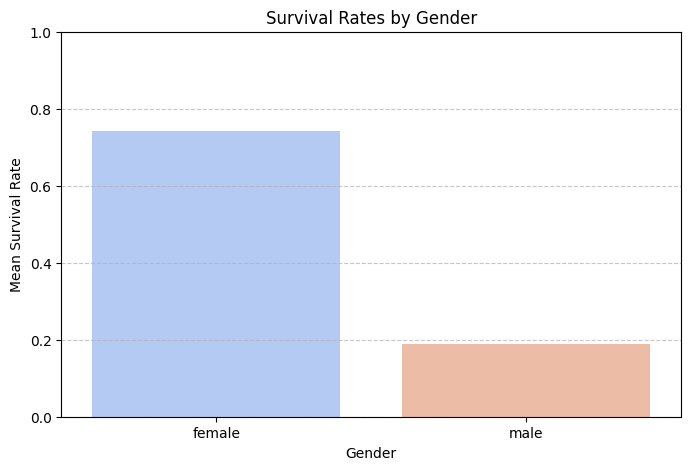

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/drive/MyDrive/Datasets/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# 1
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Mean Survival Rates by Gender:")
print(mean_survival_by_gender)

# 2
plt.figure(figsize=(8, 5))
sns.barplot(x=mean_survival_by_gender.index, y=mean_survival_by_gender.values, palette="coolwarm")
plt.title("Survival Rates by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean Survival Rate")
plt.ylim(0, 1)  # Survival rates range from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 3.2.Problem- 5:
 Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

<ipython-input-13-94e6221b0175>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_df, x='Embarked', y='Survived', hue='Sex', ci=None, palette="coolwarm")


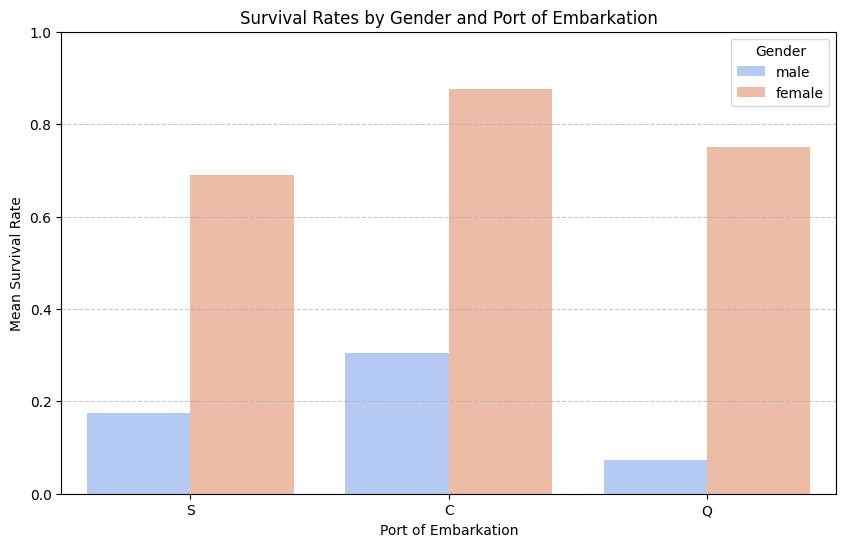

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/drive/MyDrive/Datasets/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# 1
filtered_df = df[['Sex', 'Survived', 'Embarked']].dropna(subset=['Embarked'])

# 2
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x='Embarked', y='Survived', hue='Sex', ci=None, palette="coolwarm")

# 3
plt.title("Survival Rates by Gender and Port of Embarkation")
plt.xlabel("Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.ylim(0, 1)
plt.legend(title="Gender")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 3.2.Problem- 6{Optional}:
 Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
 ’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
 and age group. Draw a visualization using a any plotting library to represent this graphically

<ipython-input-15-1718bbb1e2a5>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_survival = filtered_df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()


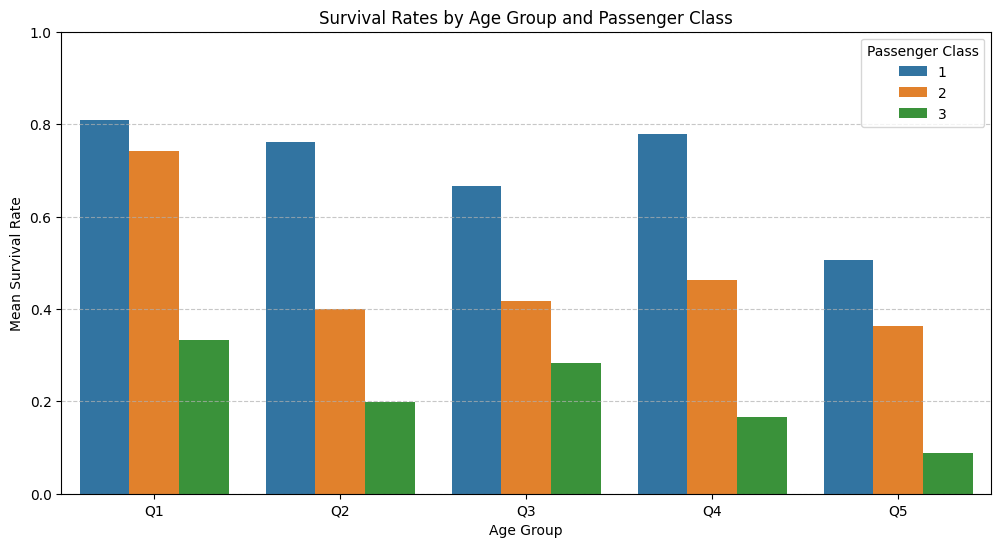

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/Datasets/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# 1
filtered_df = df[['Age', 'Pclass', 'Survived']].dropna()

# 2
filtered_df['AgeGroup'] = pd.qcut(filtered_df['Age'], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])

# 3
mean_survival = filtered_df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()

# 4
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c"]
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_survival, x='AgeGroup', y='Survived', hue='Pclass', palette=custom_palette)

# 5
plt.title("Survival Rates by Age Group and Passenger Class")
plt.xlabel("Age Group")
plt.ylabel("Mean Survival Rate")
plt.ylim(0, 1)
plt.legend(title="Passenger Class")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
